<a href="https://colab.research.google.com/github/shambhavi-maker/Prediction-using-Unsupervised-ML/blob/main/Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE SPARK FOUNDATION
(GRADUATE ROTATIONAL INTERNSHIP PROGRAM)

## DATA SCIENECE & BUISNESS ANALYTICS TASK-2

###Prediction using Unsupervised ML
> From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually. 

NAME:SHAMBHAVI

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **IMPORTING THE LIBERARIES**

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

##**LOAD AND READ THE FILE**

In [3]:
Iris=pd.read_csv('/content/drive/MyDrive/DATA for colab/Iris.csv')
Iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


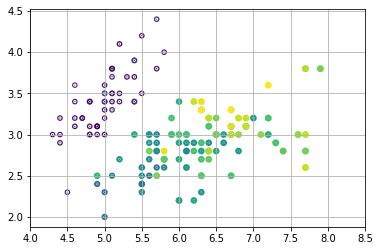

In [4]:
#SCATTER PLOT OF DATA BEFORE DOING CLUSTRING
plt.scatter(Iris['SepalLengthCm'],Iris['SepalWidthCm'],Iris['PetalLengthCm'],Iris['PetalWidthCm'],linewidths=4.5)
plt.xlim(4,8.5)
plt.grid()

In [5]:
#Finding the optimal value for clustering the data

k_value_range=range(1,15)#by looking the data, here I gave a range to the value of k and from the it find optimal value
SSE=[]                  # Sum of Squared error OR use for Euclidean distance between points 
for k in k_value_range:
  km=KMeans(n_clusters=k)
  km.fit(Iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
  #INERTIA FUNCTION CALCULATE THE SSE FROM DATA AND IT WILL STORE IN SSE VARAIABLE BY APPENDING
  SSE.append(km.inertia_)#INERTIA FUNCTION APPENDED

In [6]:
SSE  #SSE VALUE OF ALL CORRESPONDING VALUE OF K

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.56163015873016,
 38.93873974358974,
 34.19068792479662,
 29.954086421037225,
 27.839591136933244,
 26.550950496871554,
 24.4899618992119,
 23.31534239130435,
 21.649628541049598,
 20.587841269841274]

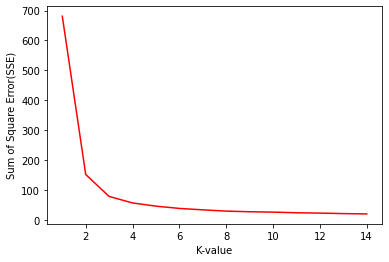

In [7]:
#ELBOW GRAPH THIS GRAPH WILL HELP US FOR FINDING THE OPTIMAL VALUE OF K.
#THIS GRAPH WILL LOOK SAME AS OUR HAND STRUCTURE SO ITS ELBOW POSITION WILL TELL US THAT AT WHAT LOCATION WE WILL GET THE OPTIMAL VALUE OF CLUSTERING WITH LOW ERROR(SSE)
#PLOTTING OF ELBOW GRAPH
plt.xlabel('K-value')
plt.ylabel('Sum of Square Error(SSE)')
plt.plot(k_value_range,SSE,color='r')

In [8]:
# CLUSTERING 
#MAKING CLASSES BY TAKING K=3(ACHIEVED BY ABOVE ELBOW GRAPGH i.e 3)
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
#this statement done that,it will form cluster as per your k value and fit value as per the cluster(class)
Predicted_y=km.fit_predict(Iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
print("Clustring done ")

Clustring done 


In [10]:
Predicted_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [11]:
Iris['cluster']=Predicted_y
Iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
5,6,5.4,3.9,1.7,0.4,Iris-setosa,1
6,7,4.6,3.4,1.4,0.3,Iris-setosa,1
7,8,5.0,3.4,1.5,0.2,Iris-setosa,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,1
9,10,4.9,3.1,1.5,0.1,Iris-setosa,1


In [12]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   cluster        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 7.7+ KB


In [13]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,0.840000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.803349
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,1.750000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


**CLUSTER CENTERS**

In [14]:
km.cluster_centers_   
#WE HAVE CENTER VALUES IN THE FORMAT IS [SEPALLENGTH,SEPALWIDTH,PETALLENGTH,PETALWIDTH]
#WE HAVE 3 CLUSTER SO HERE YOU CAN SEE 3 CENTROID

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

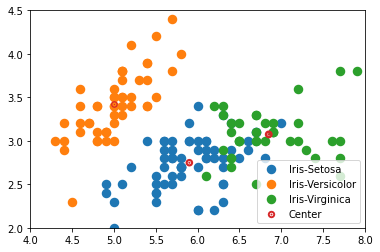

In [15]:
group_1=Iris[Iris.cluster==0]   #ASSIGNING THE CLUSTER=0 VALUE TO THE VARIABLE
group_2=Iris[Iris.cluster==1]   #ASSIGNING THE CLUSTER=1 VALUE TO THE VARIABLE
group_3=Iris[Iris.cluster==2]   #ASSIGNING THE CLUSTER=2 VALUE TO THE VARIABLE
plt.scatter(group_1['SepalLengthCm'],group_1['SepalWidthCm'],linewidths=3.5,label='Iris-Setosa')
plt.scatter(group_2['SepalLengthCm'],group_2['SepalWidthCm'],linewidths=3.5,label='Iris-Versicolor')
plt.scatter(group_3['SepalLengthCm'],group_3['SepalWidthCm'],linewidths=3.5,label='Iris-Virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],linewidth=5.5,label='Center')
plt.xlim(4,8)
plt.ylim(2,4.5)
plt.legend()